In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay)
from imblearn.over_sampling import SMOTE
import joblib

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [ ]:
# 2. Load Dataset
df = pd.read_csv("data/payments.csv")
print("Ukuran dataset:", df.shape)
display(df.head())

Ukuran dataset: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# 3. Info & Cek Missing Values
display(df.info())
print("\nJumlah Missing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

None


Jumlah Missing Values:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [7]:
# 4. Rename dan drop kolom ID (jika ada)
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# Target kolom: default.payment.next.month
df = df.rename(columns={'default.payment.next.month': 'default'})


Distribusi target pada kolom 'default payment next month':
default payment next month
0    23364
1     6636
Name: count, dtype: int64


C:\Users\inteL\AppData\Local\Temp\ipykernel_18200\1179828549.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='coolwarm')


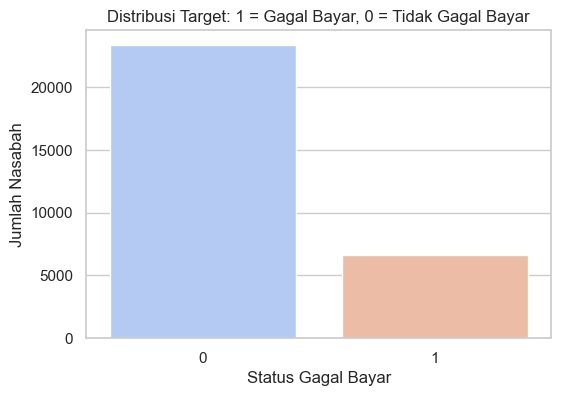

In [9]:
# 5. Eksplorasi Awal (EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Cari nama kolom target
target_col = None
for col in df.columns:
    if "default" in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("Kolom target tidak ditemukan dalam dataset!")

print(f"\nDistribusi target pada kolom '{target_col}':")
print(df[target_col].value_counts())

# Visualisasi distribusi
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, palette='coolwarm')
plt.title("Distribusi Target: 1 = Gagal Bayar, 0 = Tidak Gagal Bayar")
plt.xlabel("Status Gagal Bayar")
plt.ylabel("Jumlah Nasabah")
plt.show()


In [11]:
# 6.pisahkan fitur dan target
target_col = None
for col in df.columns:
    if "default" in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("Kolom target tidak ditemukan dalam dataset!")

X = df.drop(columns=[target_col])
y = df[target_col]

print(f"Kolom target yang digunakan: {target_col}")


Kolom target yang digunakan: default payment next month


In [12]:
# 7. Split data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data latih:", X_train.shape, "Data uji:", X_test.shape)

Data latih: (24000, 23) Data uji: (6000, 23)


In [13]:
# 8. Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [14]:
# 9. Tangani class imbalance dengan SMOTE
print("Distribusi sebelum SMOTE:", np.bincount(y_train))
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)
print("Distribusi sesudah SMOTE:", np.bincount(y_res))

Distribusi sebelum SMOTE: [18691  5309]
Distribusi sesudah SMOTE: [18691 18691]


In [15]:
# 10. Training Model Logistic Regression
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
model.fit(X_res, y_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'



=== Classification Report ===
              precision    recall  f1-score   support

           0     0.8663    0.6850    0.7651      4673
           1     0.3614    0.6277    0.4587      1327

    accuracy                         0.6723      6000
   macro avg     0.6138    0.6564    0.6119      6000
weighted avg     0.7546    0.6723    0.6973      6000



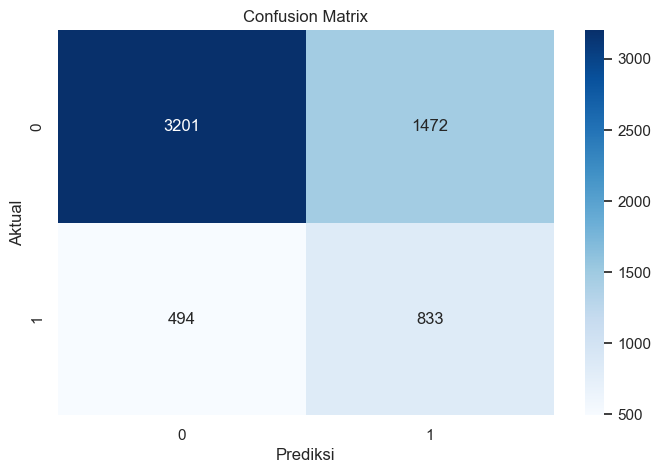

Nilai AUC: 0.7107


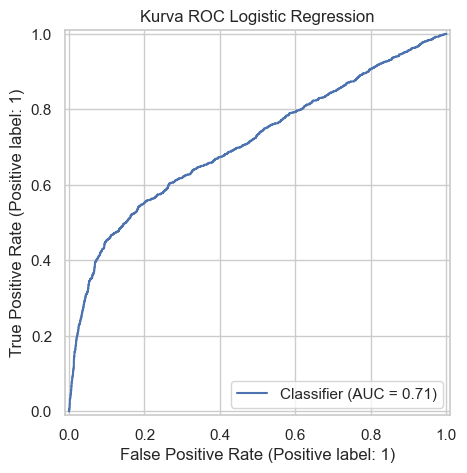

In [16]:
# 11. Evaluasi Model
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# ROC & AUC
auc = roc_auc_score(y_test, y_prob)
print(f"Nilai AUC: {auc:.4f}")

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("Kurva ROC Logistic Regression")
plt.show()

In [17]:
# 12. Simpan Model & Scaler
import os
os.makedirs("models", exist_ok=True)
joblib.dump({'model': model, 'scaler': scaler, 'features': X.columns.tolist()},
            "models/logistic_credit_model.pkl")
print("Model berhasil disimpan ke: models/logistic_credit_model.pkl")

Model berhasil disimpan ke: models/logistic_credit_model.pkl
